Unicórnio é um termo usado na industria capital de risco para descrever uma startup de capital fechado com valor superior a UU$ 1 bilhão 

In [93]:
# importar libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## base de dados: https://data.mendeley.com/datasets/jnm7f9vzpz/1?utm_source=chatgpt.com

In [5]:
# ler dados

base_dados = pd.read_excel("unicornios.xlsx")
#-----------------------------------------------
# possui 658 linhas e 18 colunas
base_dados.shape


(658, 18)

In [6]:
# primeiros registros
base_dados.head()

,CompanyID,Name,ValuationUSDbillions,ValuationDate,Industry,MainIndustry,Countries,Country1,Country2,Founders,FoundersSource,Founder1,Founder2,Founder3,Founder4,Founder5,Founder6,NoOfFounders
0,253,Infra.Market,2.5,August 2021[244],Marketplace,Marketplace,India,India,NaN,"Aaditya Sharda, Souvik Sengupta",OriginalSource,Aaditya Sharda,Souvik Sengupta,NaN,NaN,NaN,NaN,2.0
1,552,Licious,1.0,October 2021[491],Retail,Retail,India,India,NaN,"Abhay Hanjura, Vivek Gupta",OriginalSource,Abhay Hanjura,Vivek Gupta,NaN,NaN,NaN,NaN,2.0
2,425,Innovaccer,1.3,February 2021[383],Health care,Health,India / US,India,US,"Abhinav Shashank, Kanav Hasija, Sandeep Gupta",OriginalSource,Abhinav Shashank,Kanav Hasija,Sandeep Gupta,NaN,NaN,NaN,3.0
3,580,NoBroker,1.0,November 2021[512],NaN,NaN,India,India,NaN,"Akhil Gupta, Amit Agarwal, Saurabh Garg",OriginalSource,Akhil Gupta,Amit Agarwal,Saurabh Garg,NaN,NaN,NaN,3.0
4,656,Physics Wallah,1.1,June 2022[568],Educational technology,Education,India,India,NaN,Alakh Pandey,OriginalSource,Alakh Pandey,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
# ver colunas existentes na base de dados
base_dados.columns

Index(['CompanyID', 'Name', 'ValuationUSDbillions', 'ValuationDate',
       'Industry', 'MainIndustry', 'Countries', 'Country1', 'Country2',
       'Founders', 'FoundersSource', 'Founder1', 'Founder2', 'Founder3',
       'Founder4', 'Founder5', 'Founder6', 'NoOfFounders'],
      dtype='object')

In [8]:
# Renomear
base_dados.rename( columns={
        'CompanyID': 'ID_Empresa',
        'Name': 'Empresa',
        'ValuationUSDbillions': 'Valor_Bilhoes_USD',
        'ValuationDate': 'Data_Avaliacao',
        'Industry': 'Setor_Detalhado',
        'MainIndustry': 'Setor_Principal',
        'Countries': 'Paises_Operacao',
        'Country1': 'Pais_Sede',
        'Country2': 'Pais_Secundario',
        'Founders': 'Lista_Fundadores',
        'FoundersSource': 'Fonte_Dados',
        'Founder1': 'Fundador_1',
        'Founder2': 'Fundador_2',
        'Founder3': 'Fundador_3',
        'Founder4': 'Fundador_4',
        'Founder5': 'Fundador_5',
        'Founder6': 'Fundador_6',
        'NoOfFounders': 'Qtd_Fundadores',
    }, inplace=True)

    

In [9]:
#verificar tipo de informação
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Empresa         658 non-null    int64  
 1   Empresa            658 non-null    object 
 2   Valor_Bilhoes_USD  657 non-null    float64
 3   Data_Avaliacao     658 non-null    object 
 4   Setor_Detalhado    594 non-null    object 
 5   Setor_Principal    594 non-null    object 
 6   Paises_Operacao    658 non-null    object 
 7   Pais_Sede          658 non-null    object 
 8   Pais_Secundario    55 non-null     object 
 9   Lista_Fundadores   138 non-null    object 
 10  Fonte_Dados        349 non-null    object 
 11  Fundador_1         341 non-null    object 
 12  Fundador_2         226 non-null    object 
 13  Fundador_3         111 non-null    object 
 14  Fundador_4         39 non-null     object 
 15  Fundador_5         14 non-null     object 
 16  Fundador_6         4 non-n

In [10]:
# ver campos com valores nulos
base_dados.isnull().sum()

ID_Empresa             0
Empresa                0
Valor_Bilhoes_USD      1
Data_Avaliacao         0
Setor_Detalhado       64
Setor_Principal       64
Paises_Operacao        0
Pais_Sede              0
Pais_Secundario      603
Lista_Fundadores     520
Fonte_Dados          309
Fundador_1           317
Fundador_2           432
Fundador_3           547
Fundador_4           619
Fundador_5           644
Fundador_6           654
Qtd_Fundadores       316
dtype: int64

In [11]:
# remover colunas
colunas_remover = [
    'Pais_Secundario',
    'Lista_Fundadores',
    'Fonte_Dados',
    'Fundador_1',
    'Fundador_2',
    'Fundador_3',
    'Fundador_4',
    'Fundador_5',
    'Fundador_6',
    'Qtd_Fundadores'
]

base_dados = base_dados.drop(columns=colunas_remover)


In [12]:
# ver colunas após remoção
base_dados.columns


Index(['ID_Empresa', 'Empresa', 'Valor_Bilhoes_USD', 'Data_Avaliacao',
       'Setor_Detalhado', 'Setor_Principal', 'Paises_Operacao', 'Pais_Sede'],
      dtype='object')

<Axes: title={'center': 'Analisando Campos Nulos'}>

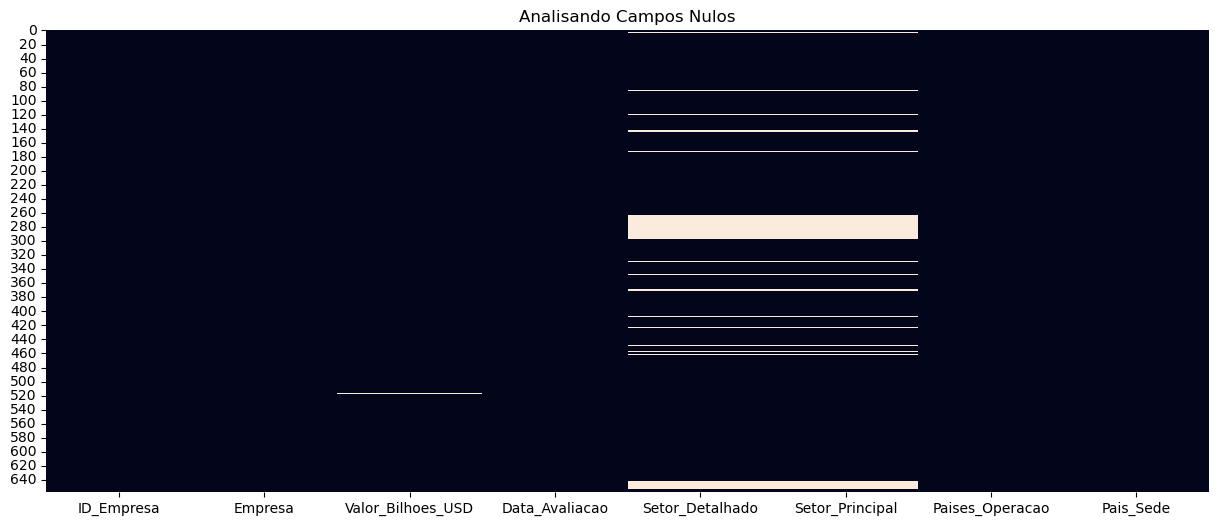

In [13]:
# visão grafica
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(base_dados.isnull(),cbar=False)

In [15]:
# ver valores unicos
base_dados.nunique()

ID_Empresa           658
Empresa              657
Valor_Bilhoes_USD    146
Data_Avaliacao       606
Setor_Detalhado      155
Setor_Principal      122
Paises_Operacao       76
Pais_Sede             66
dtype: int64

In [31]:
# ver valores unicos em ranking
base_dados['Setor_Detalhado'].value_counts().head(20)

Setor_Detalhado
Financial technology       71
Software                   50
E-commerce                 30
Cybersecurity              23
Artificial intelligence    19
Financial services         18
Technology                 17
Marketplace                16
Cryptocurrency             15
Healthcare                 15
Transportation             14
Logistics                  13
Educational technology     12
Retail                     11
Software as a service      10
Blockchain                  8
Insurance                   8
Health technology           6
Finance                     6
Education                   5
Name: count, dtype: int64

In [32]:
# ver valores unicos em ranking
base_dados['Setor_Detalhado'].value_counts(normalize=True).head(20)

Setor_Detalhado
Financial technology       0.119529
Software                   0.084175
E-commerce                 0.050505
Cybersecurity              0.038721
Artificial intelligence    0.031987
Financial services         0.030303
Technology                 0.028620
Marketplace                0.026936
Cryptocurrency             0.025253
Healthcare                 0.025253
Transportation             0.023569
Logistics                  0.021886
Educational technology     0.020202
Retail                     0.018519
Software as a service      0.016835
Blockchain                 0.013468
Insurance                  0.013468
Health technology          0.010101
Finance                    0.010101
Education                  0.008418
Name: proportion, dtype: float64

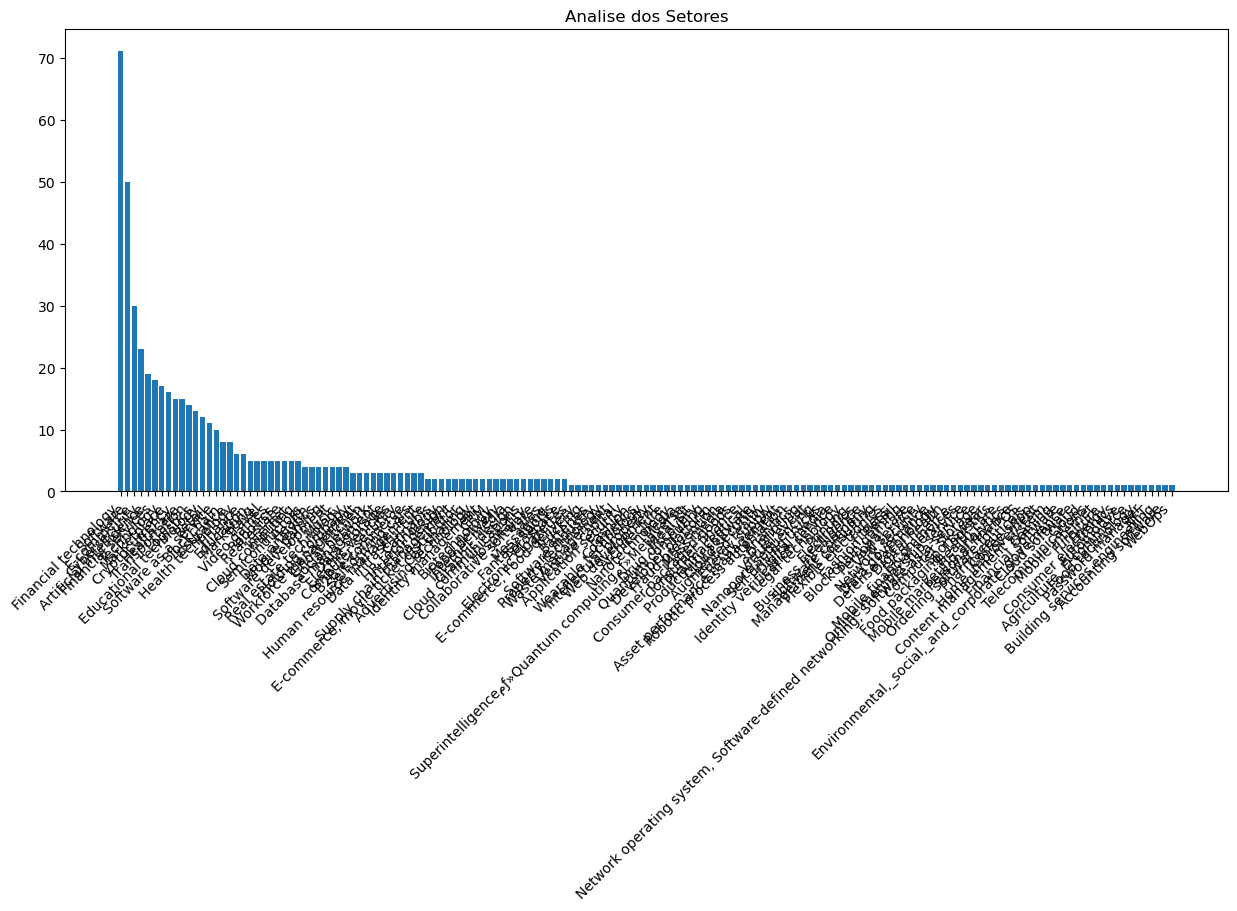

In [36]:
plt.figure(figsize=(15,6))
plt.title('Analise dos Setores')
plt.bar(base_dados['Setor_Detalhado'].value_counts().index, base_dados['Setor_Detalhado'].value_counts())
plt.xticks(rotation=45, ha='right');

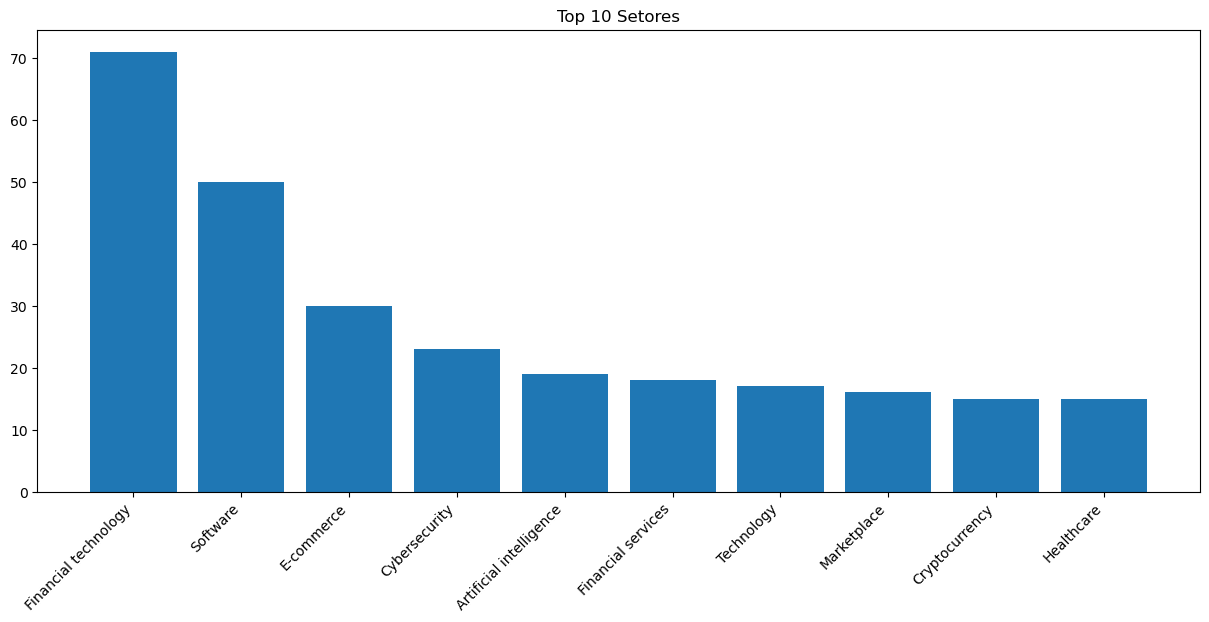

In [26]:
# ver apenas o top 10 dos setores
top10 = base_dados['Setor_Detalhado'].value_counts().head(10)

plt.figure(figsize=(15,6))
plt.title('Top 10 Setores')
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45, ha='right')
plt.show()


In [37]:
# 20 países sede
analise = round( base_dados['Pais_Sede'].value_counts(normalize=True).head(20)*100,1)

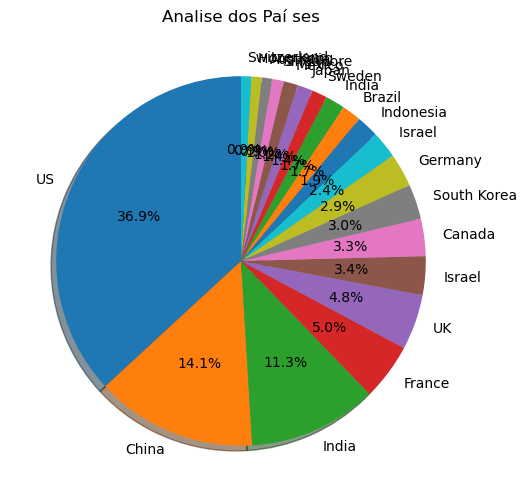

In [44]:
# plot geral dos paises
plt.figure(figsize=(15,6))
plt.title('Analise dos Países Sede gerador de Unicórnios')
plt.pie(
    analise,
    labels = analise.index,
    shadow= True,
    startangle=90,
    autopct='%1.1f%%'
);

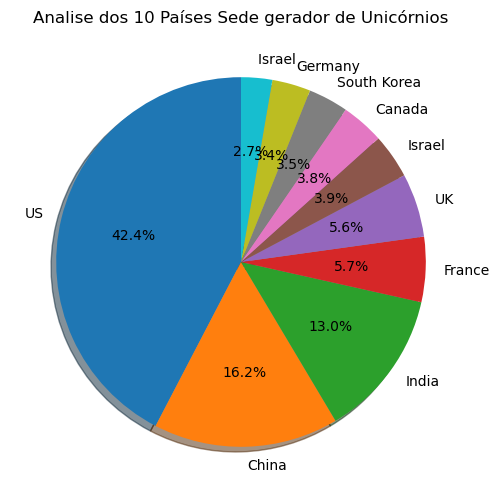

In [46]:
# Top 10 dos paises
plt.figure(figsize=(15,6))
plt.title('Analise dos 10 Países Sede gerador de Unicórnios')
plt.pie(
    analise.head(10),
    labels = analise.index[0:10],
    shadow= True,
    startangle=90,
    autopct='%1.1f%%'
);

In [57]:
# conversão para data
# remover tudo entre colchetes e espaços extras
base_dados['Data_Avaliacao_limpa'] = base_dados['Data_Avaliacao'].astype(str).str.replace(r'\[.*\]', '', regex=True).str.strip()
# converter para datetime
base_dados['Data_Avaliacao'] = pd.to_datetime(base_dados['Data_Avaliacao_limpa'], errors='coerce')
# ver resultado
base_dados[['Data_Avaliacao', 'Data_Avaliacao_limpa']].head(10)



,Data_Avaliacao,Data_Avaliacao_limpa
0,2021-08-01,2021-08-01
1,2021-10-01,2021-10-01
2,2021-02-01,2021-02-01
3,2021-11-01,2021-11-01
4,2022-06-01,2022-06-01
5,NaT,NaT
6,2018-11-01,2018-11-01
7,NaT,NaT
8,NaT,NaT
9,2019-10-01,2019-10-01


In [59]:
# extrair o Ano e Mês
base_dados['Mês'] = pd.DatetimeIndex( base_dados['Data_Avaliacao_limpa']).month
base_dados['Ano'] = pd.DatetimeIndex( base_dados['Data_Avaliacao_limpa']).year
base_dados.head()

,ID_Empresa,Empresa,Valor_Bilhoes_USD,Data_Avaliacao,Setor_Detalhado,Setor_Principal,Paises_Operacao,Pais_Sede,Data_Avaliacao_limpa,Mês,Ano
0,253,Infra.Market,2.5,2021-08-01,Marketplace,Marketplace,India,India,2021-08-01,8.0,2021.0
1,552,Licious,1.0,2021-10-01,Retail,Retail,India,India,2021-10-01,10.0,2021.0
2,425,Innovaccer,1.3,2021-02-01,Health care,Health,India / US,India,2021-02-01,2.0,2021.0
3,580,NoBroker,1.0,2021-11-01,NaN,NaN,India,India,2021-11-01,11.0,2021.0
4,656,Physics Wallah,1.1,2022-06-01,Educational technology,Education,India,India,2022-06-01,6.0,2022.0


In [62]:
base_dados['Mês'] = base_dados['Mês'].astype('Int64')  # mantém NaN como nativo do pandas
base_dados['Ano'] = base_dados['Ano'].astype('Int64')
base_dados.head()


,ID_Empresa,Empresa,Valor_Bilhoes_USD,Data_Avaliacao,Setor_Detalhado,Setor_Principal,Paises_Operacao,Pais_Sede,Data_Avaliacao_limpa,Mês,Ano
0,253,Infra.Market,2.5,2021-08-01,Marketplace,Marketplace,India,India,2021-08-01,8,2021
1,552,Licious,1.0,2021-10-01,Retail,Retail,India,India,2021-10-01,10,2021
2,425,Innovaccer,1.3,2021-02-01,Health care,Health,India / US,India,2021-02-01,2,2021
3,580,NoBroker,1.0,2021-11-01,NaN,NaN,India,India,2021-11-01,11,2021
4,656,Physics Wallah,1.1,2022-06-01,Educational technology,Education,India,India,2022-06-01,6,2022


In [70]:
# tabela analitica
analise_agrupada = base_dados.groupby(by = ['Pais_Sede', 'Ano', 'Mês', 'Empresa']).count()['ID_Empresa'].reset_index()
analise_agrupada

,Pais_Sede,Ano,Mês,Empresa,ID_Empresa
0,Argentina,2019,11,Uala,1
1,Argentina,2021,8,TiendaNube,1
2,Argentina,2021,7,Mural,1
3,Armenia,2021,8,Picsart,1
4,Australia,2020,12,Judo Bank,1
...,...,...,...,...,...
616,US,2022,7,Flexe,1
617,US,2022,8,Rippling,1
618,US,2022,9,"New York General Group, Inc.",1
619,US,2020,10,Tipalti,1


In [71]:
# filtrar por país
analise_agrupada.loc[
analise_agrupada['Pais_Sede'] == 'Brazil'
]

,Pais_Sede,Ano,Mês,Empresa,ID_Empresa
15,Brazil,2018,11,IFood,1
16,Brazil,2019,6,Loggi,1
17,Brazil,2019,10,Ebanx,1
18,Brazil,2020,1,Loft Brazil Technology,1
19,Brazil,2020,8,Wildlife,1
20,Brazil,2020,9,VTEX,1
21,Brazil,2020,12,C6 Bank,1
22,Brazil,2020,12,Creditas,1
23,Brazil,2021,1,MadeiraMadeira,1
24,Brazil,2021,5,QuintoAndar,1


In [86]:
# Agrupa por país e setor e soma apenas a coluna Valor_Bilhoes_USD
analise_valor = base_dados.groupby(
    ['Pais_Sede', 'Setor_Detalhado']
)['Valor_Bilhoes_USD'].sum().reset_index()

analise_valor.head()


,Pais_Sede,Setor_Detalhado,Valor_Bilhoes_USD
0,Argentina,E-commerce,3.10
1,Argentina,Personal finance,2.45
2,Argentina,Technology,2.00
3,Armenia,Graphic design,1.00
4,Australia,Education,1.00


In [87]:
analise_valor.sort_values('Valor_Bilhoes_USD', ascending=False)

,Pais_Sede,Setor_Detalhado,Valor_Bilhoes_USD
354,US,Software,152.86
62,China,Internet,140.00
289,US,Aerospace,131.20
51,China,E-commerce,124.00
276,UK,Financial technology,92.20
...,...,...,...
259,Thailand,"E-commerce, Food delivery",1.00
257,Switzerland,Software,1.00
256,Switzerland,Financial technology,1.00
269,UK,Cloud computing,1.00


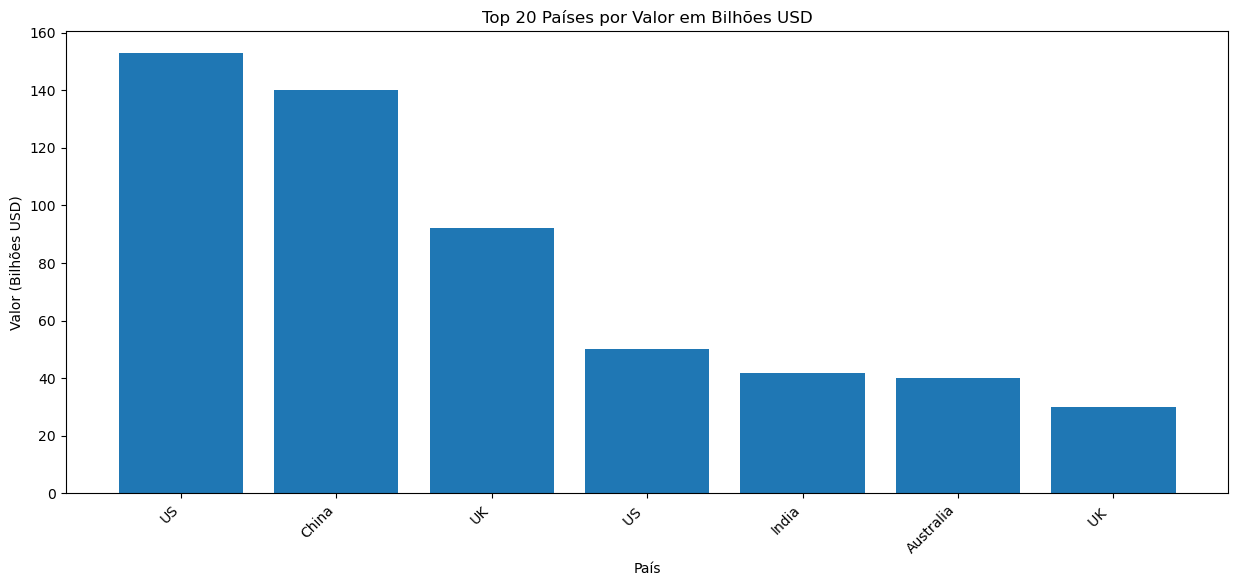

In [99]:
# Seleciona os 20 países com maiores valores
top_20 = analise_valor.nlargest(20, 'Valor_Bilhoes_USD')  # ou analise_valor.sort_values(...).head(20)

# Plotando
plt.figure(figsize=(15,6))
plt.bar(top_20['Pais_Sede'], top_20['Valor_Bilhoes_USD'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Países por Valor em Bilhões USD')
plt.ylabel('Valor (Bilhões USD)')
plt.xlabel('País')
plt.show()
